In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_validate

import seaborn as sns

In [ ]:
COLUMNS = ['Age', 'Loan Amount Request (USD)', 'Credit Score','No. of Defaults',
           'Property Age', 'Co-Applicant', 'Loan Sanction Amount (USD)',
           'Income (USD)','Income Stability','Current Loan Expenses (USD)',
           'Dependents']

In [ ]:
data = pd.read_csv('train.csv', usecols=COLUMNS)

In [ ]:
data.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Co-Applicant,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,2.515000e+04,30000.000000,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,2.631119e+03,-4.743867,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,1.132268e+04,74.614593,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,3.777000e+02,-999.000000,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,1.650450e+03,1.000000,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,2.223250e+03,1.000000,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,3.091408e+03,1.000000,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.777460e+06,1.000000,481907.320000


In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)),list(obj[obj].index))

Categorical variables: 1 ['Income Stability']


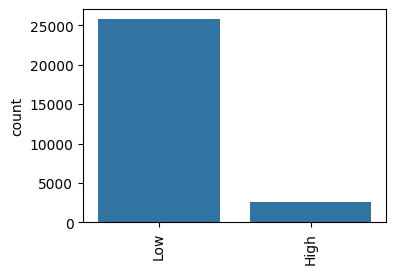

In [ ]:
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [ ]:
def encode_income_stability(x):
    if x == 'Low':
        return 0
    else:
        return 1

In [ ]:
data['Income Stability'] = data['Income Stability'].apply(encode_income_stability)
data.describe()

,Age,Income (USD),Income Stability,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Co-Applicant,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,2.515000e+04,30000.000000,29660.000000
mean,40.092300,2.630574e+03,0.141633,88826.333855,400.936876,2.253027,739.885381,0.193933,2.631119e+03,-4.743867,47649.342208
std,16.045129,1.126272e+04,0.348679,59536.949605,242.545375,0.951162,72.163846,0.395384,1.132268e+04,74.614593,48221.146686
min,18.000000,3.777000e+02,0.000000,6048.240000,-999.000000,1.000000,580.000000,0.000000,3.777000e+02,-999.000000,-999.000000
25%,25.000000,1.650457e+03,0.000000,41177.755000,247.667500,2.000000,681.880000,0.000000,1.650450e+03,1.000000,0.000000
50%,40.000000,2.222435e+03,0.000000,75128.075000,375.205000,2.000000,739.820000,0.000000,2.223250e+03,1.000000,35209.395000
75%,55.000000,3.090593e+03,0.000000,119964.605000,521.292500,3.000000,799.120000,0.000000,3.091408e+03,1.000000,74261.250000
max,65.000000,1.777460e+06,1.000000,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.777460e+06,1.000000,481907.320000


In [ ]:
DISC_COLS = ['Co-Applicant', 'Loan Sanction Amount (USD)', 'Current Loan Expenses (USD)']

def remove_negative(x):
    return max(0, x)

for col in DISC_COLS:
    data[col] = data[col].apply(remove_negative)

In [ ]:
data.describe()

,Age,Income (USD),Income Stability,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Co-Applicant,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,30000.000000,30000.000000,27507.000000,28297.000000,30000.000000,2.515000e+04,30000.000000,30000.00000
mean,40.092300,2.630574e+03,0.141633,88826.333855,404.532272,2.253027,739.885381,0.193933,2.631119e+03,0.850533,47120.57173
std,16.045129,1.126272e+04,0.348679,59536.949605,220.872861,0.951162,72.163846,0.395384,1.132268e+04,0.356554,48200.56193
min,18.000000,3.777000e+02,0.000000,6048.240000,0.000000,1.000000,580.000000,0.000000,3.777000e+02,0.000000,0.00000
25%,25.000000,1.650457e+03,0.000000,41177.755000,245.607500,2.000000,681.880000,0.000000,1.650450e+03,1.000000,0.00000
50%,40.000000,2.222435e+03,0.000000,75128.075000,373.845000,2.000000,739.820000,0.000000,2.223250e+03,1.000000,34401.32000
75%,55.000000,3.090593e+03,0.000000,119964.605000,520.102500,3.000000,799.120000,0.000000,3.091408e+03,1.000000,73763.53250
max,65.000000,1.777460e+06,1.000000,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.777460e+06,1.000000,481907.32000


In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)),list(obj[obj].index))
data.isna().sum()

Categorical variables: 0 []


Age                               0
Income (USD)                   4576
Income Stability                  0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Property Age                   4850
Co-Applicant                      0
Loan Sanction Amount (USD)        0
dtype: int64

In [ ]:
NEW_COLUMNS = ['Loan Amount Request (USD)', 'Credit Score','No. of Defaults', 'Loan Sanction Amount (USD)',
           'Income (USD)','Income Stability','Current Loan Expenses (USD)']

In [ ]:
data = data[NEW_COLUMNS].copy()
data.describe()

,Loan Amount Request (USD),Credit Score,No. of Defaults,Loan Sanction Amount (USD),Income (USD),Income Stability,Current Loan Expenses (USD)
count,30000.000000,28297.000000,30000.000000,30000.00000,2.542400e+04,30000.000000,30000.000000
mean,88826.333855,739.885381,0.193933,47120.57173,2.630574e+03,0.141633,404.532272
std,59536.949605,72.163846,0.395384,48200.56193,1.126272e+04,0.348679,220.872861
min,6048.240000,580.000000,0.000000,0.00000,3.777000e+02,0.000000,0.000000
25%,41177.755000,681.880000,0.000000,0.00000,1.650457e+03,0.000000,245.607500
50%,75128.075000,739.820000,0.000000,34401.32000,2.222435e+03,0.000000,373.845000
75%,119964.605000,799.120000,0.000000,73763.53250,3.090593e+03,0.000000,520.102500
max,621497.820000,896.260000,1.000000,481907.32000,1.777460e+06,1.000000,3840.880000


In [ ]:
data.isna().sum()

Loan Amount Request (USD)         0
Credit Score                   1703
No. of Defaults                   0
Loan Sanction Amount (USD)        0
Income (USD)                   4576
Income Stability                  0
Current Loan Expenses (USD)       0
dtype: int64

In [ ]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)
data.describe()

,Loan Amount Request (USD),Credit Score,No. of Defaults,Loan Sanction Amount (USD),Income (USD),Income Stability,Current Loan Expenses (USD)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.134500,0.505550,0.193933,0.097779,0.001268,0.141633,0.105323
std,0.096737,0.221608,0.395384,0.100020,0.005834,0.348679,0.057506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.057079,0.333318,0.000000,0.000000,0.000768,0.000000,0.063946
50%,0.112243,0.505550,0.000000,0.071386,0.001179,0.000000,0.097333
75%,0.185095,0.680263,0.000000,0.153066,0.001402,0.000000,0.135412
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan Sanction Amount (USD)'], axis=1)
y = data['Loan Sanction Amount (USD)']


In [ ]:
X = np.asarray(X.values.tolist())
y = np.asarray(y.values.tolist())

In [ ]:
print("The shape of the independent fatures are ",X.shape)
print("The shape of the dependent fatures are ",y.shape)

The shape of the independent fatures are  (30000, 6)
The shape of the dependent fatures are  (30000,)


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
X = np.concatenate((X,np.ones((30000,1))), axis = 1)
X

array([[0.10847573, 0.72547904, 0.        , ..., 0.        , 0.06276687,
        1.        ],
       [0.0662755 , 0.63365585, 0.        , ..., 0.        , 0.1290876 ,
        1.        ],
       [0.06425352, 0.800449  , 0.        , ..., 1.        , 0.04476839,
        1.        ],
       ...,
       [0.12245006, 0.50555044, 0.        , ..., 0.        , 0.15181677,
        1.        ],
       [0.22174986, 0.3075634 , 1.        , ..., 0.        , 0.09849045,
        1.        ],
       [0.24411797, 0.74445077, 0.        , ..., 1.        , 0.18067214,
        1.        ]])

In [ ]:
y

array([[0.11331469],
       [0.0777535 ],
       [0.07568764],
       ...,
       [0.1266998 ],
       [0.20702501],
       [0.24323743]])

In [ ]:
Indpendent_Variables = pd.DataFrame(X)
Indpendent_Variables

,0,1,2,3,4,5,6
0,0.108476,0.725479,0.0,0.000875,0.0,0.062767,1.0
1,0.066276,0.633656,0.0,0.002575,0.0,0.129088,1.0
2,0.064254,0.800449,0.0,0.000344,1.0,0.044768,1.0
3,0.120253,0.799026,1.0,0.001268,1.0,0.077727,1.0
4,0.175174,0.523462,1.0,0.001259,0.0,0.127942,1.0
...,...,...,...,...,...,...,...
29995,0.114729,0.915734,0.0,0.002584,0.0,0.188066,1.0
29996,0.098378,0.472428,0.0,0.000692,0.0,0.065881,1.0
29997,0.122450,0.505550,0.0,0.001268,0.0,0.151817,1.0
29998,0.221750,0.307563,1.0,0.001148,0.0,0.098490,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1)

In [ ]:
class multipleLinearRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights

    Returns:
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate
    index (int) : Index to fetch the corresponding values of W, X and y

    Returns:
    W (array) : Update Values of Weight
    """
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i])
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      print(f"Completed {j-1} epochs")
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss


  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()
  def r_squared(self, y_true, y_pred):
        """
        Parameters:
        y_true (array): Actual target values
        y_pred (array): Predicted target values

        Returns:
        r2 (float): R-squared (coefficient of determination)
        """
        y_bar = np.mean(y_true)
        ss_total = np.sum((y_true - y_bar) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2
  def mean_squared_error(self, y_true, y_pred):
        """
        Parameters:
        y_true (array): Actual target values
        y_pred (array): Predicted target values

        Returns:
        mse (float): Mean Squared Error
        """
        mse = np.mean((y_true - y_pred) ** 2)
        return mse


In [ ]:
regressor = multipleLinearRegression()

In [ ]:
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=200, alpha=0.0001)

Completed -1 epochs
Completed 0 epochs
Completed 1 epochs
Completed 2 epochs
Completed 3 epochs
Completed 4 epochs
Completed 5 epochs
Completed 6 epochs
Completed 7 epochs
Completed 8 epochs
Completed 9 epochs
Completed 10 epochs
Completed 11 epochs
Completed 12 epochs
Completed 13 epochs
Completed 14 epochs
Completed 15 epochs
Completed 16 epochs
Completed 17 epochs
Completed 18 epochs
Completed 19 epochs
Completed 20 epochs
Completed 21 epochs
Completed 22 epochs
Completed 23 epochs
Completed 24 epochs
Completed 25 epochs
Completed 26 epochs
Completed 27 epochs
Completed 28 epochs
Completed 29 epochs
Completed 30 epochs
Completed 31 epochs
Completed 32 epochs
Completed 33 epochs
Completed 34 epochs
Completed 35 epochs
Completed 36 epochs
Completed 37 epochs
Completed 38 epochs
Completed 39 epochs
Completed 40 epochs
Completed 41 epochs
Completed 42 epochs
Completed 43 epochs
Completed 44 epochs
Completed 45 epochs
Completed 46 epochs
Completed 47 epochs
Completed 48 epochs
Completed 

In [ ]:
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

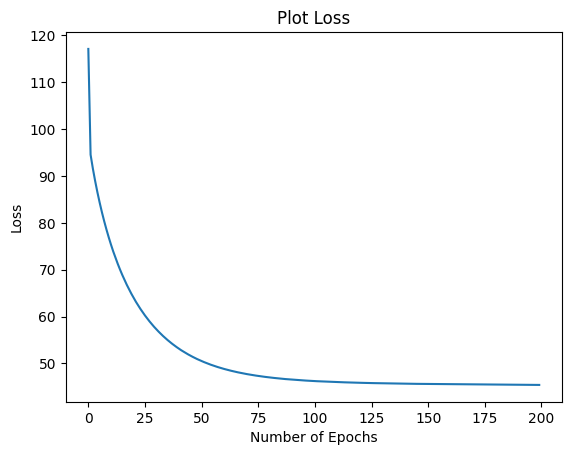

In [ ]:
regressor.plotLoss(train_loss, num_epochs)

In [ ]:
y_pred,test_loss = regressor.test(X_test,y_test,W_trained)

In [ ]:
mse = regressor.mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.0940558530599379
